In [5]:
# Pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from config import user_name, password, host, data_base

In [6]:
# Create Engine and Pass in PostgreSQL Connection
engine = create_engine(f'postgresql://{user_name}:{password}@{host}/{data_base}')
conn = engine.connect()

In [18]:
# Query records from the salaries csv
salaries_table = pd.read_sql("SELECT * FROM salaries", conn)
salaries_table.head()

,id,emp_no,salary,from_date,to_date
0,1,10001,60117,1986-06-26,1987-06-26
1,2,10002,65828,1996-08-03,1997-08-03
2,3,10003,40006,1995-12-03,1996-12-02
3,4,10004,40054,1986-12-01,1987-12-01
4,5,10005,78228,1989-09-12,1990-09-12


In [19]:
# Query records from the titles csv
titles_table = pd.read_sql("SELECT * FROM titles", conn)
titles_table.head()

,id,emp_no,title,from_date,to_date
0,1,10001,Senior Engineer,1986-06-26,9999-01-01
1,2,10002,Staff,1996-08-03,9999-01-01
2,3,10003,Senior Engineer,1995-12-03,9999-01-01
3,4,10004,Engineer,1986-12-01,1995-12-01
4,5,10004,Senior Engineer,1995-12-01,9999-01-01


In [29]:
salaries_titles = pd.read_sql("select a.emp_no, a.salary, b.title \
                             from salaries a \
                             join titles b \
                             on (a.emp_no = b.emp_no)", conn)
salaries_titles.head()

,emp_no,salary,title
0,10001,60117,Senior Engineer
1,10005,78228,Senior Staff
2,10005,78228,Staff
3,10010,72488,Engineer
4,10011,42365,Staff


In [31]:
# Create a DataFrame with the average salary for each title. 
salary_averages = pd.DataFrame(salaries_titles.groupby(["title"]).mean()["salary"]).reset_index()
salary_averages.head()

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614


In [35]:
title_data = salary_averages['title']
salary_data = salary_averages['salary']

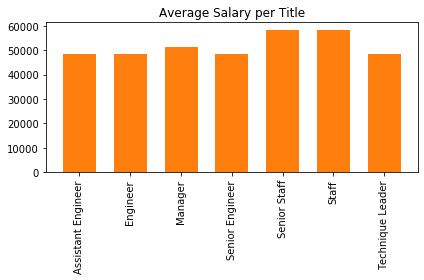

In [42]:
colors = ['#ff7f0e']
plt.bar(title_data, salary_data, width=.65, color=colors)
plt.title('Average Salary per Title')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('average_salary.png')